In [38]:
# Libraries
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt, ipywidgets as widgets
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

# Credit Risk Analysis - Machine Learning models <br>

The objective of this analysis is to understand which are the factors that are more effecting the probability of having an high credit risk of a given company, using initially only the data of the explanatory variables of previous year to predict the credit risk of the consequent one (true values vs forecasts). <br>
Then it can be added new explanatory variables 'delayed' e.g. leverage of two years, three years, (...) before. <br>
After understood some general behavior (through the previous notebook), this specific notebook has the objective to build different models to predict the credit risk level (low/high) in an year for each company, and also compare each presented model (in order to both interpret them and see their accuracy).

**Financial Data Science (UniPV) - Prof. Paolo Giudici** <br>
*Computer Engineering (Data Science) - A.Y. 2022/23* <br>
*Francesco Amato, 507767*

## Import the dataset & data manipulations

In [39]:
# Load the datatset
companies_df = pd.read_csv('../dataset/one-hot-credit-risk.tar.gz', compression='gzip')
companies_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,...,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,...,0,0,0,0,0,0,0,0,0,0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,...,0,0,0,0,0,0,0,0,0,0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,...,0,0,0,0,0,0,0,0,0,1
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,...,0,0,0,0,1,0,0,0,0,0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121003,ASTOR VILLAGE S.R.L.,3161,4635,4742,4499,4277.0,3650.0,985.0,1818.0,1790.0,...,0,0,0,0,0,0,0,0,0,0
121004,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,...,0,0,0,0,0,0,0,0,0,0
121005,GARRIDO MURO SOCIEDAD LIMITADA,3161,3146,2989,3101,2746.0,3154.0,260.0,13.0,48.0,...,0,0,0,0,0,0,0,0,0,0
121006,CENTRO INGROSSO JOLLY S.R.L.,3161,2519,2290,2244,1761.0,1821.0,74.0,48.0,60.0,...,0,0,0,0,1,0,0,0,0,0


### Balancing the companies (use same number for high and low level credit risk)

In [40]:
# Fix the unbalanced case
high_risk_df = companies_df[companies_df['MScore.2019.int'] == 1]
low_risk_df = companies_df[companies_df['MScore.2019.int'] == 0].sample(n=len(high_risk_df), random_state=0)
restricted_df = pd.concat([low_risk_df, high_risk_df])
restricted_df.sort_index(inplace=True)

## Consider past year company data to predict next year credit risk level

### Select the year to use to predict the consequent one credit risk level

**Beware of the year choice**, because of the already mentioned Covid (possible) effect.

In [41]:
year_widget = widgets.IntSlider(value=2018, min=2015, max=2019, description='Year:', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='d')
year_widget

IntSlider(value=2018, description='Year:', max=2019, min=2015)

### First objective: feature selection

Since we want to just understand which are the features that are more helpful to improve the predictive accuracy, and the other performance metrics, we will start considering a very easy model (**Logistic Regression**). <br>
Once found the most impactful features we will see whether considering other more complex models (mantaining fixed the features) the performance metrics will change signficantly (or not).

#### Easiest model: credit risk level of previous year, to predict the one of next year

In [42]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int']]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int
0,1
4,1
7,0
11,0
16,0
...,...
120994,0
120995,1
120998,0
121003,0


In [43]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



**Consideration:** The overall obtained performances can be considered good, but what if we add and consider other features?<br>

#### Add another feature: credit risk level + turnover of previous year, to predict the one of next year

In [44]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'Turnover.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,Turnover.2018
0,1,9612
4,1,45626
7,0,42928
11,0,35518
16,0,32655
...,...,...
120994,0,3580
120995,1,4329
120998,0,3276
121003,0,4742


In [45]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Add another feature: credit risk score + EBIT of previous year, to predict the one of next year

In [46]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'EBIT.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,EBIT.2018
0,1,623.0
4,1,-672.0
7,0,3928.0
11,0,328.0
16,0,3782.0
...,...,...
120994,0,69.0
120995,1,92.0
120998,0,267.0
121003,0,1790.0


In [47]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.5%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.80      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.80      0.79      4864



#### Add another feature: credit risk level + PLTax of previous year, to predict the one of next year

In [48]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'PLTax.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,PLTax.2018
0,1,22.0
4,1,-599.0
7,0,2826.0
11,0,157.0
16,0,2629.0
...,...,...
120994,0,29.0
120995,1,13.0
120998,0,211.0
121003,0,1283.0


In [49]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.8%
 - Test accuracy: 79.4%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.63      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Add another feature: credit risk level of previous year + country, to predict the one of next year

In [50]:
X = pd.concat([restricted_df[['MScore.'+str(year_widget.value)+'.int']], restricted_df.loc[:, 'France':'Spain']], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,France,Germany,Italy,Spain
0,1,0,0,1,0
4,1,0,0,1,0
7,0,0,0,1,0
11,0,1,0,0,0
16,0,0,0,1,0
...,...,...,...,...,...
120994,0,0,0,1,0
120995,1,0,0,1,0
120998,0,1,0,0,0
121003,0,0,0,1,0


In [51]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Add another feature: credit risk level of previous year + general sector, to predict the one of next year

In [52]:
X = pd.concat([restricted_df[['MScore.'+str(year_widget.value)+'.int']], restricted_df.loc[:, 'Automobiles and Components':'Utilities']], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,...,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120994,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120995,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Add another feature: credit risk level + Leverage of previous year, to predict the one of next year

In [54]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'Leverage.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,Leverage.2018
0,1,56.77
4,1,2.13
7,0,0.22
11,0,3.36
16,0,2.43
...,...,...
120994,0,8.98
120995,1,16.37
120998,0,0.95
121003,0,0.24


In [55]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Add another feature: credit risk level + ROE of previous year, to predict the one of next year

In [56]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'ROE.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,ROE.2018
0,1,8.24
4,1,-5.17
7,0,5.20
11,0,14.99
16,0,29.14
...,...,...
120994,0,6.76
120995,1,5.87
120998,0,46.24
121003,0,11.01


In [57]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.83      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Add another feature: credit risk level + TAsset of previous year, to predict the one of next year

In [58]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'TAsset.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,TAsset.2018
0,1,15455
4,1,36205
7,0,66209
11,0,11734
16,0,30920
...,...,...
120994,0,4213
120995,1,3755
120998,0,822
121003,0,14438


In [59]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.82      2467
           1       0.94      0.62      0.75      2397

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



#### Combine all features together: credit risk level + Turnover + EBIT + PLTax + Sector + Country + Leverage + ROE + TAsset of previous year, to predict the one of the next year

In [60]:
X = restricted_df[['MScore.'+str(year_widget.value)+'.int', 'Turnover.'+str(year_widget.value), 'EBIT.'+str(year_widget.value), 'PLTax.'+str(year_widget.value), 'Leverage.'+str(year_widget.value), 'ROE.'+str(year_widget.value), 'TAsset.'+str(year_widget.value)]]
X = pd.concat([X, restricted_df.loc[:, 'Automobiles and Components':'Utilities']], axis=1)
X = pd.concat([X, restricted_df.loc[:, 'France':'Spain']], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2018.int,Turnover.2018,EBIT.2018,PLTax.2018,Leverage.2018,ROE.2018,TAsset.2018,Automobiles and Components,Capital Goods,Commercial and professional services,...,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities,France,Germany,Italy,Spain
0,1,9612,623.0,22.0,56.77,8.24,15455,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,45626,-672.0,-599.0,2.13,-5.17,36205,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,0,42928,3928.0,2826.0,0.22,5.20,66209,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11,0,35518,328.0,157.0,3.36,14.99,11734,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16,0,32655,3782.0,2629.0,2.43,29.14,30920,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120994,0,3580,69.0,29.0,8.98,6.76,4213,0,1,0,...,0,0,0,0,0,0,0,0,1,0
120995,1,4329,92.0,13.0,16.37,5.87,3755,0,0,0,...,0,0,0,0,0,0,0,0,1,0
120998,0,3276,267.0,211.0,0.95,46.24,822,0,0,0,...,0,0,0,0,0,0,1,0,0,0
121003,0,4742,1790.0,1283.0,0.24,11.01,14438,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 79.4%
 - Test accuracy: 79.9%

Test               precision    recall  f1-score   support

           0       0.75      0.90      0.82      2467
           1       0.87      0.69      0.77      2397

    accuracy                           0.80      4864
   macro avg       0.81      0.80      0.80      4864
weighted avg       0.81      0.80      0.80      4864



## Consider also older than one year company data to predict consequent year credit risk level

### Models

#### All past years credit risk levels to predict the one of the next year

In [62]:
for i in range(0, year_widget.value - 2014):
    if i == 0: X = restricted_df[['MScore.2015.int']]
    else: X = pd.concat([X, restricted_df[['MScore.'+str(2015 + i)+'.int']]], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2015.int,MScore.2016.int,MScore.2017.int,MScore.2018.int
0,1,0,1,1
4,0,0,1,1
7,0,0,0,0
11,0,0,0,0
16,0,0,0,0
...,...,...,...,...
120994,1,1,0,0
120995,1,1,1,1
120998,0,0,0,0
121003,0,0,0,0


In [63]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 81.4%
 - Test accuracy: 82.9%

Test               precision    recall  f1-score   support

           0       0.78      0.92      0.85      2467
           1       0.90      0.73      0.81      2397

    accuracy                           0.83      4864
   macro avg       0.84      0.83      0.83      4864
weighted avg       0.84      0.83      0.83      4864



#### All features together: credit risk level + Turnover + EBIT + PLTax + Sector + Country + Leverage + ROE + TAsset of also past years, to predict the one of the next year

In [64]:
for i in range(0, year_widget.value - 2014):
    if i == 0: X = restricted_df[['MScore.2015.int', 'Turnover.2015', 'EBIT.2015', 'PLTax.2015', 'Leverage.2015', 'ROE.2015', 'TAsset.2015']]
    else: X = pd.concat([X, restricted_df[['MScore.'+str(2015 + i)+'.int', 'Turnover.'+str(2015 + i), 'EBIT.'+str(2015 + i), 'PLTax.'+str(2015 + i), 'Leverage.'+str(2015 + i), 'ROE.'+str(2015 + i), 'TAsset.'+str(2015 + i)]]], axis=1)
X = pd.concat([X, restricted_df.loc[:, 'Automobiles and Components':'Utilities']], axis=1)
X = pd.concat([X, restricted_df.loc[:, 'France':'Spain']], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2015.int,Turnover.2015,EBIT.2015,PLTax.2015,Leverage.2015,ROE.2015,TAsset.2015,MScore.2016.int,Turnover.2016,EBIT.2016,...,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities,France,Germany,Italy,Spain
0,1,5600.0,-1479.0,-1140.0,48.07,-471.72,11659.0,0,7941.0,885.0,...,0,0,0,0,0,0,0,0,1,0
4,0,62263.0,987.0,-1116.0,2.11,-8.19,41323.0,0,57074.0,97.0,...,1,0,0,0,0,0,0,0,1,0
7,0,23477.0,2276.0,1341.0,0.41,5.20,64851.0,0,44521.0,3881.0,...,0,0,0,0,0,0,0,0,1,0
11,0,26877.0,68.0,-13.0,4.33,39.46,7800.0,0,30934.0,384.0,...,0,0,0,0,0,0,1,0,0,0
16,0,18761.0,1678.0,966.0,4.31,24.87,21199.0,0,19766.0,1811.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120994,1,4296.0,-261.0,-205.0,8.53,-26.75,4390.0,1,4155.0,0.0,...,0,0,0,0,0,0,0,0,1,0
120995,1,4258.0,107.0,-4.0,19.22,3.50,3824.0,1,4307.0,105.0,...,0,0,0,0,0,0,0,0,1,0
120998,0,3015.0,195.0,155.0,1.77,29.82,1154.0,0,3074.0,179.0,...,0,0,0,0,0,0,1,0,0,0
121003,0,3650.0,800.0,494.0,0.34,6.31,11695.0,0,4277.0,1154.0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 81.8%
 - Test accuracy: 83.1%

Test               precision    recall  f1-score   support

           0       0.80      0.89      0.84      2467
           1       0.87      0.77      0.82      2397

    accuracy                           0.83      4864
   macro avg       0.84      0.83      0.83      4864
weighted avg       0.83      0.83      0.83      4864



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Other models

### Recap: best features (Logistic Regression)

In [66]:
for i in range(0, year_widget.value - 2014):
    if i == 0: X = restricted_df[['MScore.2015.int']]
    else: X = pd.concat([X, restricted_df[['MScore.'+str(2015 + i)+'.int']]], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)
X

,MScore.2015.int,MScore.2016.int,MScore.2017.int,MScore.2018.int
0,1,0,1,1
4,0,0,1,1
7,0,0,0,0
11,0,0,0,0
16,0,0,0,0
...,...,...,...,...
120994,1,1,0,0
120995,1,1,1,1
120998,0,0,0,0
121003,0,0,0,0


In [67]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 81.4%
 - Test accuracy: 82.9%

Test               precision    recall  f1-score   support

           0       0.78      0.92      0.85      2467
           1       0.90      0.73      0.81      2397

    accuracy                           0.83      4864
   macro avg       0.84      0.83      0.83      4864
weighted avg       0.84      0.83      0.83      4864



#### Features importance

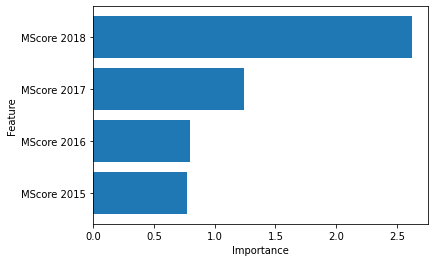

In [68]:
importance = lr.coef_[0]
importance=np.sort(importance)

sn.set_style()
plt.barh([i for i in range (len(importance))], importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
list_ticks, features_names = [], []
for i in range(0, year_widget.value - 2014):
    list_ticks.append(i)
    features_names.append('MScore '+str(2015 + i))
plt.yticks(list_ticks, features_names)
plt.show()

### Decision Tree

In [69]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, np.ravel(y_train))
print_performances('Decision Tree Classifier', dtc, X_train, y_train, X_test, y_test)

Decision Tree Classifier
 - Train accuracy: 81.6%
 - Test accuracy: 83.0%

Test               precision    recall  f1-score   support

           0       0.79      0.90      0.84      2467
           1       0.88      0.75      0.81      2397

    accuracy                           0.83      4864
   macro avg       0.84      0.83      0.83      4864
weighted avg       0.84      0.83      0.83      4864



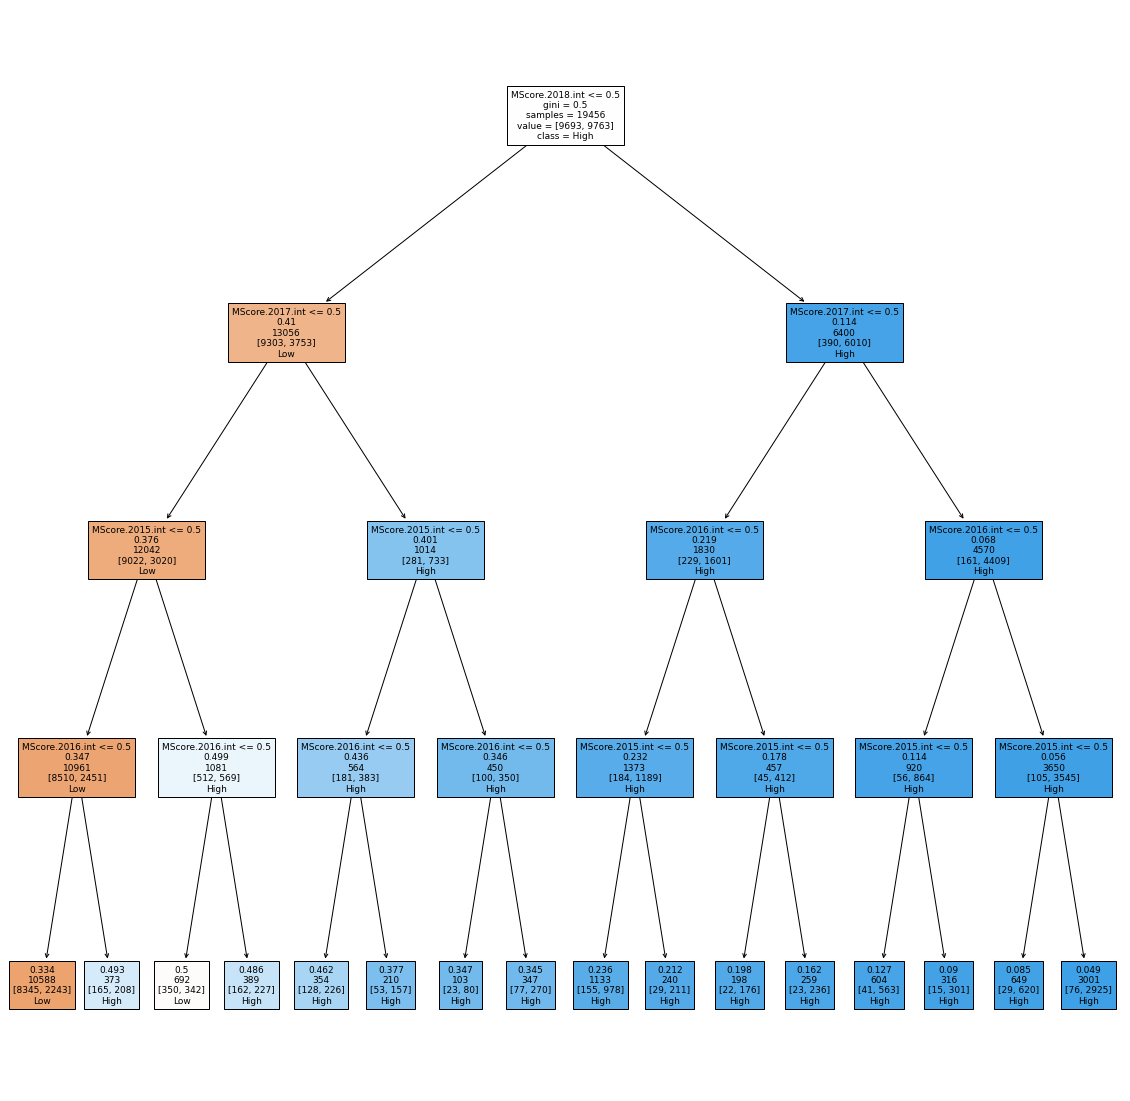

In [70]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(dtc, label='root', fontsize=9, class_names=['Low', 'High'], filled=True, feature_names=['MScore.2015.int', 'MScore.2016.int','MScore.2017.int','MScore.2018.int', 'MScore.2019.int']);

### Random Forest

In [71]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, np.ravel(y_train))
print_performances('Random Forest Classifier', rfc, X_train, y_train, X_test, y_test)

Random Forest Classifier
 - Train accuracy: 81.6%
 - Test accuracy: 83.0%

Test               precision    recall  f1-score   support

           0       0.79      0.90      0.84      2467
           1       0.88      0.75      0.81      2397

    accuracy                           0.83      4864
   macro avg       0.84      0.83      0.83      4864
weighted avg       0.84      0.83      0.83      4864



### Support Vector

In [72]:
svc = SVC(kernel='poly', random_state=0)
svc.fit(X_train, np.ravel(y_train))
print_performances('Support Vector Classifier', svc, X_train, y_train, X_test, y_test)

Support Vector Classifier
 - Train accuracy: 81.6%
 - Test accuracy: 83.0%

Test               precision    recall  f1-score   support

           0       0.79      0.90      0.84      2467
           1       0.88      0.75      0.81      2397

    accuracy                           0.83      4864
   macro avg       0.84      0.83      0.83      4864
weighted avg       0.84      0.83      0.83      4864



### Models comparison through ROC curves

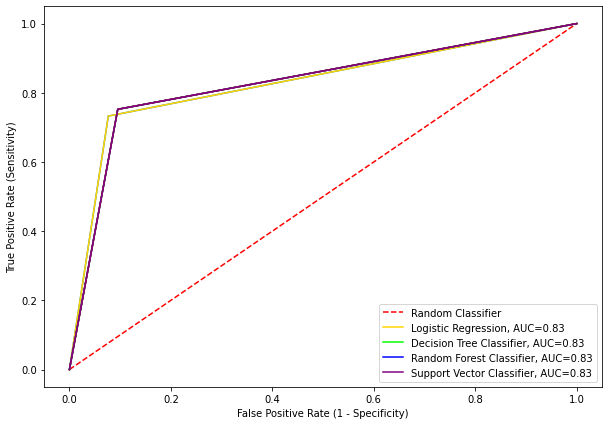

In [73]:
plt.figure(0, figsize=(10, 7)).clf()

colors = ['#ff0000', '#ffd700', '#00ff00', '#0000ff', '#800080']

# Random Classifier
random_fpr, random_tpr, _ = metrics.roc_curve(y_test, [0 for _ in range(len(y_test))])
plt.plot(random_fpr, random_tpr, linestyle='--', color=colors[0], label='Random Classifier')

# Logistic Regression
y_pred = lr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[1], label='Logistic Regression, AUC='+str(auc))

# Decision Tree Classifier
y_pred = dtc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[2], label='Decision Tree Classifier, AUC='+str(auc))

# Random Forest Classifier
y_pred = rfc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[3], label='Random Forest Classifier, AUC='+str(auc))

# Support Vector Classifier
y_pred = svc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[4], label='Support Vector Classifier, AUC='+str(auc))

plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.legend()
plt.show();